# Support Vector Machine Implementation 


In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

The dataset has already been analysed and preprocessed. Hence some columns are dropped and some are taken with special consideration. But all of these are studied and logical. If the look abtruse, read the documentation. 


In [3]:
dataset = pd.read_csv('Dataset With IDNumbers And Output with Result.csv')
dataset1=dataset.drop_duplicates()
dataset1.drop(['Controller ID'], axis=1)
del dataset1['Controller ID']
print ("Dataset Lenght: ", len(dataset)) 
print ("Dataset Shape: ", dataset.shape) 
print ("Dataset Lenght: ", len(dataset1)) 
print ("Dataset Shape: ", dataset1.shape) 
x = dataset1.iloc[:,0:4].values
y= dataset1.iloc[:,4].values

Dataset Lenght:  81002
Dataset Shape:  (81002, 6)
Dataset Lenght:  78854
Dataset Shape:  (78854, 5)


Using ScikitLearn to import SVC Classifier and train/test split


In [4]:
from sklearn.model_selection import train_test_split  
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf', C=1).fit(x_train, y_train)


To Plot the accuracy variance for different kernels in SVM

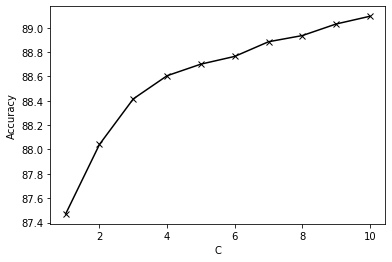

[87.470674021939, 88.04134170312598, 88.41544607190413, 88.6056686322998, 88.70077991249762, 88.7641874326295, 88.8846617208801, 88.9353877369856, 89.03049901718344, 89.09390653731532]


In [5]:
kernels=['linear', 'poly', 'rbf','sigmoid']


k_range = range(1,11)
scores = []
score_100=[]
for k in k_range:
    svclassifier = SVC(kernel='rbf', C=k).fit(x_train, y_train)
    svclassifier.fit(x_train, y_train)
    scores.append(svclassifier.score(x_test,y_test))
for items in scores:
    score_100.append(items*100)
    
plt.figure()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.plot(k_range,score_100,'-x',color='black')
plt.show()
print(score_100)
